In [1]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import os
import random
import time
import pickle
import gc
import re
import itertools

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
main_dir = '/home/fbm221/W266FinalProject'

In [4]:
outdata_path = main_dir + '/saved_files/LDA/Gender/'

In [5]:
all_speeches_topics_df = pd.read_pickle(outdata_path+'speeches_topics_gender_36')
all_speeches_topics_df.shape

(62716, 9)

In [6]:
all_speeches_topics_df.head()

,Topic_Count,Prim_Topic,Prim_Topic_Name,Prim_Topic_Contrib,Prim_Topic_Keywords,Sec_Topic,Sec_Topic_Name,Sec_Topic_Contrib,Speech_id
0,2.0,8.0,Judicial Nominations,0.76,"vote,judge,nomination,senators,district,record...",9.0,Common Phrases,0.20,1080099024
1,10.0,35.0,Great Nation,0.54,"history,great,nation,day,american,live,first,w...",5.0,Judicial System,0.16,1080165561
2,8.0,1.0,Military,0.28,"veterans,service,serve,va,military,honor,men_w...",0.0,Crime and Immigration,0.21,1090156218
3,6.0,26.0,Random Verbs 2,0.44,"think,want,come,know,get,issue,talk,way,see,co...",4.0,Random Verbs,0.31,1060121740
4,7.0,19.0,Natural Disasters,0.39,"emergency,home,help,texas,state,florida,flood,...",20.0,Federal Assistance Programs,0.30,1100177577


In [7]:
all_speeches_topics_df.Speech_id = all_speeches_topics_df.Speech_id.astype('int')

In [8]:
indata_path = main_dir + '/Data/Predictions/'

In [9]:
descr_pred_df = pd.read_pickle(os.path.join(indata_path, 'gender_preds.pkl'))
descr_pred_df.shape

(62716, 20)

In [10]:
descr_pred_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match,ids,pred_probs_combo,pred_combo
0,1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,66.0,0.0,0.0,1.0,Mrs. CAPPS,"CAPPS, LOIS",fuzzy,1080099024,0.562533,True
1,1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,58.0,0.0,1.0,1.0,Ms. LEE,"LEE, BARBARA",fuzzy,1080165561,0.556122,True
2,1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,49.0,1.0,1.0,1.0,Ms. SOLIS,"SOLIS, HILDA",exact,1090156218,0.901894,True
3,1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,56.0,0.0,0.0,1.0,Mrs. McCARTHY of New York,"MCCARTHY, CAROLYN",exact,1060121740,0.768826,True
4,1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,59.0,0.0,0.0,1.0,Mrs. DRAKE,"DRAKE, THELMA",exact,1100177577,0.500139,True


In [11]:
final_df = descr_pred_df.merge(all_speeches_topics_df, 
                               left_on='speech_id',
                               right_on='Speech_id')
final_df.shape

(62716, 29)

In [12]:
final_df['Correct_pred'] = final_df.Female == final_df.pred_combo
np.mean(final_df['Correct_pred'])

0.765928949550354

In [13]:
final_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,...,Topic_Count,Prim_Topic,Prim_Topic_Name,Prim_Topic_Contrib,Prim_Topic_Keywords,Sec_Topic,Sec_Topic_Name,Sec_Topic_Contrib,Speech_id,Correct_pred
0,1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,...,2.0,8.0,Judicial Nominations,0.76,"vote,judge,nomination,senators,district,record...",9.0,Common Phrases,0.20,1080099024,True
1,1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,...,10.0,35.0,Great Nation,0.54,"history,great,nation,day,american,live,first,w...",5.0,Judicial System,0.16,1080165561,True
2,1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,...,8.0,1.0,Military,0.28,"veterans,service,serve,va,military,honor,men_w...",0.0,Crime and Immigration,0.21,1090156218,True
3,1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,...,6.0,26.0,Random Verbs 2,0.44,"think,want,come,know,get,issue,talk,way,see,co...",4.0,Random Verbs,0.31,1060121740,True
4,1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,...,7.0,19.0,Natural Disasters,0.39,"emergency,home,help,texas,state,florida,flood,...",20.0,Federal Assistance Programs,0.30,1100177577,True


In [61]:
# adjust location for the full_descr.txt file
descr_df = pd.read_csv(main_dir+'/Data/full_descr.txt', sep="|", index_col=0)
descr_df.reset_index(inplace=True)

/home/fbm221/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Average gender score by topic

In [14]:
final_df[['pred_probs_combo', 'Correct_pred', 'Prim_Topic_Name']]\
        .groupby('Prim_Topic_Name')\
        .agg({'pred_probs_combo': ['count', 'mean'],
              'Correct_pred': ['mean']})\
        .sort_values(by=('pred_probs_combo','mean'), ascending=False)

pred_probs_combo           Correct_pred
                                         count      mean         mean
Prim_Topic_Name                                                      
Healthcare and Women's Health              894  0.603577     0.780761
Poverty and Welfare                        407  0.585216     0.823096
Children's Diseases                       1475  0.575688     0.768136
Economy                                   1454  0.573777     0.777854
Natural Disasters                          593  0.572915     0.762226
Education                                 1257  0.560154     0.768496
Judicial Nominations                       879  0.556831     0.787258
Military                                   732  0.556693     0.775956
Crime and Immigration                      843  0.554952     0.763938
Great Nation                              2883  0.549842     0.760319
The Navy                                   135  0.548291     0.814815
Positive Words                            2940  0.546463     0.760884
Finance and Business                       654  0.544939     0.741590
War and Defense                            910  0.541724     0.789011
Energy                                     727  0.538509     0.755158
Taxes and Welfare                         1608  0.537163     0.777363
Scientific Research                        481  0.532755     0.775468
Federal Assistance Programs               2092  0.531175     0.780115
Foreign Trade                              533  0.530145     0.793621
National Security                         1015  0.528131     0.798030
Environment                               1205  0.528093     0.771784
Infrastructure                             336  0.527512     0.752976
States                                      79  0.525537     0.797468
Positive Words 2                          3375  0.525084     0.754667
Random Verbs                              2493  0.523122     0.760931
Elections and Parties                      544  0.520746     0.775735
Foreign Policy                            1719  0.514614     0.755672
Budgets and Spending                      2399  0.513980     0.761984
Judicial System                           1609  0.503199     0.756370
Random Verbs 2                            9437  0.492541     0.760411
Common Congressional Phrases              6003  0.488261     0.769282
Diplomacy and Security                    1955  0.487020     0.764706
Agriculture                                209  0.486617     0.770335
Legislation                               3989  0.485603     0.762848
Common Phrases                            4082  0.467653     0.757472
Costs                                      770  0.466099     0.775325

In [15]:
final_df[['pred_probs_combo', 'Correct_pred', 'Sec_Topic_Name']]\
        .groupby('Sec_Topic_Name')\
        .agg({'pred_probs_combo': ['count', 'mean'],
              'Correct_pred': ['mean']})\
        .sort_values(by=('pred_probs_combo','mean'), ascending=False)

pred_probs_combo           Correct_pred
                                         count      mean         mean
Sec_Topic_Name                                                       
Poverty and Welfare                        654  0.573650     0.766055
Healthcare and Women's Health             1064  0.570183     0.779135
Economy                                   1627  0.563489     0.769514
Education                                 1146  0.557935     0.771379
Children's Diseases                        991  0.555850     0.771948
Natural Disasters                          748  0.549575     0.731283
The Navy                                   365  0.544449     0.810959
Great Nation                              3096  0.543066     0.773579
Positive Words                            2712  0.541784     0.744469
Positive Words 2                          2709  0.537585     0.764858
Military                                   802  0.535477     0.758105
Crime and Immigration                      979  0.534481     0.760981
Finance and Business                       918  0.533002     0.758170
Random Verbs                              3491  0.529828     0.779146
Federal Assistance Programs               2460  0.525681     0.757724
Energy                                     536  0.522948     0.723881
Infrastructure                             553  0.520311     0.746835
Scientific Research                        746  0.519407     0.749330
Foreign Policy                            1178  0.518926     0.769100
Budgets and Spending                      1965  0.511970     0.781170
Taxes and Welfare                         1448  0.511525     0.754834
War and Defense                           1270  0.510515     0.770079
States                                     433  0.506792     0.757506
Legislation                               4098  0.504698     0.769888
Agriculture                                380  0.503278     0.755263
Random Verbs 2                            6956  0.501076     0.762795
Elections and Parties                     1112  0.500613     0.769784
Costs                                     1733  0.500416     0.763993
Environment                               1008  0.498783     0.774802
None                                       756  0.498098     0.781746
Judicial System                           1932  0.497967     0.760352
Diplomacy and Security                    1834  0.497376     0.755725
Judicial Nominations                       921  0.496548     0.753529
Common Congressional Phrases              5026  0.496211     0.777756
Foreign Trade                              710  0.495447     0.780282
National Security                         1529  0.492630     0.744931
Common Phrases                            2830  0.479051     0.774558

### Topics by Congress

In [70]:
congress_df = final_df[['Congress','Prim_Topic_Name', 'speech_id', 'Female', 'pred_probs_combo']]\
                .groupby(['Congress', 'Prim_Topic_Name'])\
                .agg({'speech_id': ['count'], 'Female': ['mean', 'sum'], 'pred_probs_combo': ['mean']})\
                .reset_index()
congress_df.columns = ['_'.join(col) for col in congress_df.columns]
congress_df.shape

(647, 6)

In [71]:
congress_df.head()

,Congress_,Prim_Topic_Name_,speech_id_count,Female_mean,Female_sum,pred_probs_combo_mean
0,97,Agriculture,17,0.235294,4.0,0.379829
1,97,Budgets and Spending,160,0.293750,47.0,0.479891
2,97,Children's Diseases,19,0.368421,7.0,0.457664
3,97,Common Congressional Phrases,361,0.116343,42.0,0.416162
4,97,Common Phrases,263,0.072243,19.0,0.405241


In [66]:
top_gender_topics = ["Healthcare and Women's Health", "Poverty and Welfare", "Children's Diseases",
                     "Economy", "Education"]
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red']

In [62]:
# Getting counts of women by congress
speaker_share_congress = descr_df[['Full Name', 'Party', 'State', 'Congress', 'Female']]\
                            .groupby(['Full Name', 'Party', 'State', 'Congress'])\
                            .mean()\
                            .reset_index()
speaker_share_congress = speaker_share_congress.groupby('Congress').Female.mean().reset_index()

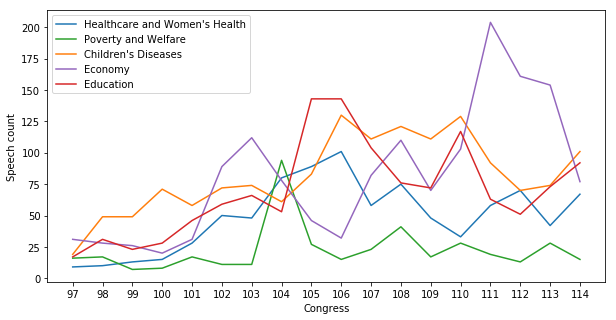

In [67]:
plt.figure(figsize=(10,5))
plt.xlabel('Congress')
plt.ylabel('Speech count')

for i in range(len(top_gender_topics)):
    x = congress_df[congress_df.Prim_Topic_Name_==top_gender_topics[i]].Congress_
    y = congress_df[congress_df.Prim_Topic_Name_==top_gender_topics[i]].speech_id_count
    plt.plot(x, y, color=colors[i], label=top_gender_topics[i])
    plt.xticks(range(97,115))
    plt.legend()

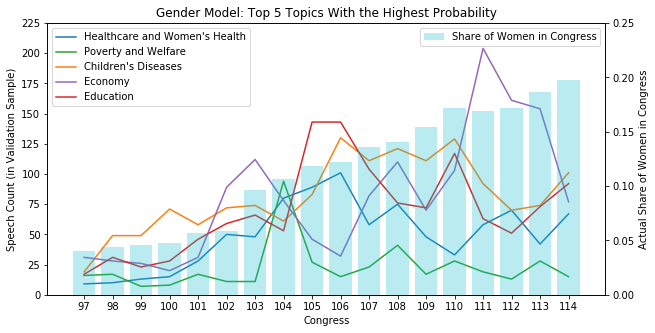

In [73]:
# this code is for 5 top topics. 
top_gender_topics = ["Healthcare and Women's Health", "Poverty and Welfare", "Children's Diseases",
                     "Economy", "Education"] # insert list of top topics
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red']
fig, ax1 = plt.subplots(figsize=(10,5))
plt.xlabel('Congress')
plt.ylabel('Speech Count (in Validation Sample)')
plt.title('Gender Model: Top 5 Topics With the Highest Probability')

for i in range(len(top_gender_topics)):
    x = congress_df[congress_df.Prim_Topic_Name_==top_gender_topics[i]].Congress_
    y = congress_df[congress_df.Prim_Topic_Name_==top_gender_topics[i]].speech_id_count
    ax1.plot(x, y, color=colors[i], label=top_gender_topics[i])
    ax1.set_xticks(range(97,115))
    ax1.legend()
ax1.set_ylim(0, 225)
ax2 = ax1.twinx()
ax2.bar(speaker_share_congress.Congress, speaker_share_congress.Female, color='tab:cyan', alpha=0.3, label='Share of Women in Congress')
ax2.set_ylim(0, 0.25)
ax2.legend(loc='upper right')
ax2.set_ylabel('Actual Share of Women in Congress')
plt.show()

### Top topics in probability bins

In [20]:
final_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,...,Topic_Count,Prim_Topic,Prim_Topic_Name,Prim_Topic_Contrib,Prim_Topic_Keywords,Sec_Topic,Sec_Topic_Name,Sec_Topic_Contrib,Speech_id,Correct_pred
0,1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,...,2.0,8.0,Judicial Nominations,0.76,"vote,judge,nomination,senators,district,record...",9.0,Common Phrases,0.20,1080099024,True
1,1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,...,10.0,35.0,Great Nation,0.54,"history,great,nation,day,american,live,first,w...",5.0,Judicial System,0.16,1080165561,True
2,1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,...,8.0,1.0,Military,0.28,"veterans,service,serve,va,military,honor,men_w...",0.0,Crime and Immigration,0.21,1090156218,True
3,1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,...,6.0,26.0,Random Verbs 2,0.44,"think,want,come,know,get,issue,talk,way,see,co...",4.0,Random Verbs,0.31,1060121740,True
4,1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,...,7.0,19.0,Natural Disasters,0.39,"emergency,home,help,texas,state,florida,flood,...",20.0,Federal Assistance Programs,0.30,1100177577,True


In [74]:
# set to 3 bins
bins = [0, 0.4, 0.6, 1]
final_df['binned'] = np.digitize(final_df.pred_probs_combo, bins)
final_df['binned'].value_counts()

3    24820
1    22043
2    15853
Name: binned, dtype: int64

In [75]:
topic_share = final_df[['Prim_Topic_Name', 'speech_id']].groupby('Prim_Topic_Name').count() / final_df.shape[0]
topic_share.columns = ['topic_share']
topic_share.reset_index(inplace=True)
topic_share.head()

,Prim_Topic_Name,topic_share
0,Agriculture,0.003332
1,Budgets and Spending,0.038252
2,Children's Diseases,0.023519
3,Common Congressional Phrases,0.095717
4,Common Phrases,0.065087


In [76]:
prob_by_bin = final_df[['binned', 'pred_probs_combo']].groupby('binned').max() 
prob_by_bin.reset_index(inplace=True)
prob_by_bin.columns = ['Bin', 'bin_max_prob']
prob_by_bin.head()

,Bin,bin_max_prob
0,1,0.399994
1,2,0.599998
2,3,0.998834


In [77]:
prob_by_gender = final_df[['Female', 'pred_probs_combo']].groupby('Female').max() 
prob_by_gender.reset_index(inplace=True)
prob_by_gender.columns = ['Gender', 'gender_max_prob']
prob_by_gender.head()

,Gender,gender_max_prob
0,0.0,0.998408
1,1.0,0.998834


In [78]:
cnt_by_bin = final_df[['binned', 'speech_id']].groupby(['binned']).count().reset_index()
cnt_by_bin.columns = ['Bin', 'Speech_cnt_bin']
cnt_by_bin.head()

,Bin,Speech_cnt_bin
0,1,22043
1,2,15853
2,3,24820


In [32]:
cnt_by_gender = final_df[['Female', 'speech_id']].groupby(['Female']).count().reset_index()
cnt_by_gender.columns = ['Gender', 'Speech_cnt_gender']
cnt_by_gender.head()

,Gender,Speech_cnt_gender
0,0.0,31358
1,1.0,31358


In [79]:
cnt_by_bin_topic = final_df[['Prim_Topic_Name', 'binned', 'speech_id']].groupby(['binned', 'Prim_Topic_Name']).count().reset_index()
cnt_by_bin_topic.columns = ['Bin', 'Prim_Topic_Name', 'Speech_cnt_bin_topic']
cnt_by_bin_topic = cnt_by_bin_topic.merge(cnt_by_bin, on='Bin')
cnt_by_bin_topic['topic_bin_share'] = cnt_by_bin_topic.Speech_cnt_bin_topic / cnt_by_bin_topic.Speech_cnt_bin
cnt_by_bin_topic = cnt_by_bin_topic.merge(topic_share, on='Prim_Topic_Name').merge(prob_by_bin, on='Bin')
cnt_by_bin_topic['topic_share_index'] = cnt_by_bin_topic.topic_bin_share / cnt_by_bin_topic.topic_share
cnt_by_bin_topic.head()

,Bin,Prim_Topic_Name,Speech_cnt_bin_topic,Speech_cnt_bin,topic_bin_share,topic_share,bin_max_prob,topic_share_index
0,1,Agriculture,84,22043,0.003811,0.003332,0.399994,1.143512
1,1,Budgets and Spending,869,22043,0.039423,0.038252,0.399994,1.030617
2,1,Children's Diseases,367,22043,0.016649,0.023519,0.399994,0.707916
3,1,Common Congressional Phrases,2419,22043,0.109740,0.095717,0.399994,1.146503
4,1,Common Phrases,1767,22043,0.080162,0.065087,0.399994,1.231604


In [33]:
cnt_by_gender_topic = final_df[['Prim_Topic_Name', 'Female', 'speech_id']].groupby(['Female', 'Prim_Topic_Name']).count().reset_index()
cnt_by_gender_topic.columns = ['Gender', 'Prim_Topic_Name', 'Speech_cnt_gender_topic']
cnt_by_gender_topic = cnt_by_gender_topic.merge(cnt_by_gender, on='Gender')
cnt_by_gender_topic['topic_gender_share'] = cnt_by_gender_topic.Speech_cnt_gender_topic / cnt_by_gender_topic.Speech_cnt_gender
cnt_by_gender_topic = cnt_by_gender_topic.merge(topic_share, on='Prim_Topic_Name').merge(prob_by_gender, on='Gender')
cnt_by_gender_topic['topic_share_index'] = cnt_by_gender_topic.topic_gender_share / cnt_by_gender_topic.topic_share
cnt_by_gender_topic.head()

,Gender,Prim_Topic_Name,Speech_cnt_gender_topic,Speech_cnt_gender,topic_gender_share,topic_share,gender_max_prob,topic_share_index
0,0.0,Agriculture,117,31358,0.003731,0.003332,0.998408,1.119617
1,0.0,Budgets and Spending,1231,31358,0.039256,0.038252,0.998408,1.026261
2,0.0,Children's Diseases,424,31358,0.013521,0.023519,0.998408,0.574915
3,0.0,Common Congressional Phrases,3565,31358,0.113687,0.095717,0.998408,1.187739
4,0.0,Common Phrases,2724,31358,0.086868,0.065087,0.998408,1.334640


In [80]:
for b in range(1,len(bins)+1):
    temp = cnt_by_bin_topic[cnt_by_bin_topic['Bin']==b]
    temp = temp.sort_values(by='topic_share_index', ascending=False)
    temp = temp[['bin_max_prob', 'Prim_Topic_Name', 'topic_share_index']]
    print(temp.head())

    bin_max_prob               Prim_Topic_Name  topic_share_index
5       0.399994                         Costs           1.245222
4       0.399994                Common Phrases           1.231604
22      0.399994                   Legislation           1.156896
7       0.399994        Diplomacy and Security           1.149709
3       0.399994  Common Congressional Phrases           1.146503
    bin_max_prob        Prim_Topic_Name  topic_share_index
52      0.599998          Foreign Trade           1.105926
46      0.599998  Elections and Parties           1.105380
71      0.599998        War and Defense           1.073798
57      0.599998        Judicial System           1.064630
55      0.599998         Infrastructure           1.047895
     bin_max_prob                Prim_Topic_Name  topic_share_index
90       0.998834  Healthcare and Women's Health           1.404738
100      0.998834            Poverty and Welfare           1.341022
97       0.998834              Natural Disaste

In [27]:
NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')

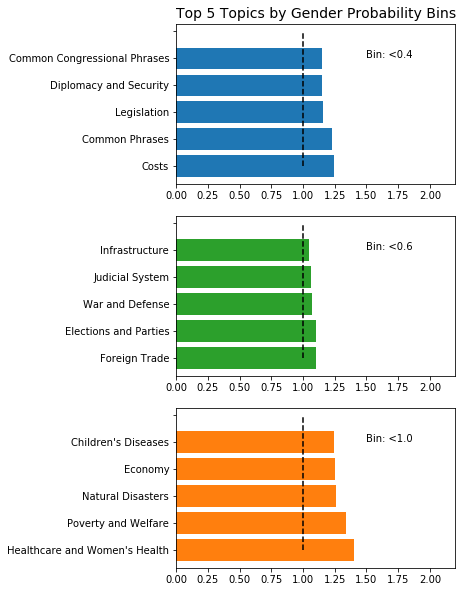

In [82]:
fig, axes = plt.subplots(nrows=len(bins)-1, figsize=(5, 10))
# fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
# fig.suptitle('Topic Share Index', fontsize=14)
axes[0].set_title('Top 5 Topics by Gender Probability Bins', fontsize=14)
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red']

for ax, b in zip(axes, range(len(bins)-1)):
    temp = cnt_by_bin_topic[cnt_by_bin_topic['Bin']==b+1]
    temp = temp.sort_values(by='topic_share_index', ascending=False)
    temp = temp[['bin_max_prob', 'Prim_Topic_Name', 'topic_share_index']]
    temp = temp.head()
    ax.text(1.5, 4, "Bin: <"+str(round(max(temp.bin_max_prob),2)), fontsize=10)
    ax.barh(temp.Prim_Topic_Name, temp.topic_share_index, align='center', color=colors[b])
    ax.vlines(x=1,ymin=0,ymax=5, linestyles='dashed')
    ax.set_xlim(0,2.2)
    ax.set_yticks(range(0,6))

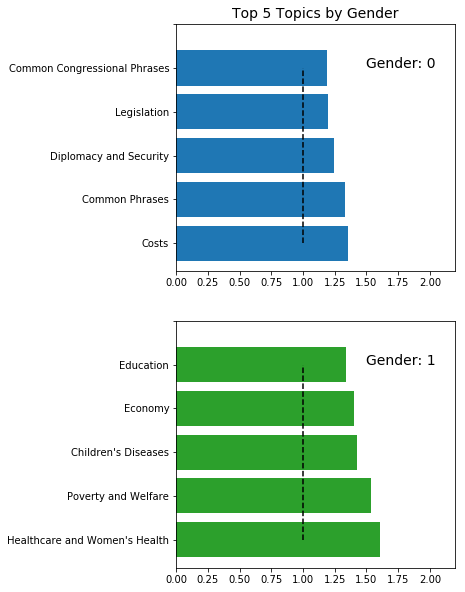

In [53]:
fig, axes = plt.subplots(2, figsize=(5, 10))
# fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
# fig.suptitle('Topic Share Index', fontsize=14)
axes[0].set_title('Top 5 Topics by Gender', fontsize=14)
colors = ['tab:blue', 'tab:green']

for ax, b in zip(axes, range(2)):
    temp = cnt_by_gender_topic[cnt_by_gender_topic['Gender'] == b]
    temp = temp.sort_values(by='topic_share_index', ascending=False)
    temp = temp[['Gender', 'Prim_Topic_Name', 'topic_share_index']]
    temp = temp.head()
    ax.text(1.5, 4, "Gender: "+str(b), fontsize=14)
    ax.barh(temp.Prim_Topic_Name, temp.topic_share_index, align='center', color=colors[b])
    ax.vlines(x=1,ymin=0,ymax=4, linestyles='dashed')
    ax.set_xlim(0,2.2)
    ax.set_yticks(range(0,6))

In [83]:
# highest count topics by bins
for b in range(1,len(bins)+1):
    temp = final_df[final_df['binned']==b]
    temp = temp[['speech_id', 'pred_probs_combo', 'Prim_Topic_Name']]\
                .groupby('Prim_Topic_Name')\
                .agg({'speech_id':['count'], 'pred_probs_combo': ['mean']})\
                .sort_values(by=('speech_id', 'count'), ascending=False)\
                .reset_index()
    print("Bin: ", bins[b-1])
    print(temp.head(5))

Bin:  0.0
                Prim_Topic_Name speech_id pred_probs_combo
                                    count             mean
0                Random Verbs 2      1163         0.141845
1  Common Congressional Phrases       788         0.140584
2                Common Phrases       585         0.140840
3                   Legislation       522         0.139784
4              Positive Words 2       334         0.146015
Bin:  0.2
                Prim_Topic_Name speech_id pred_probs_combo
                                    count             mean
0                Random Verbs 2      2514         0.299434
1  Common Congressional Phrases      1631         0.299736
2                Common Phrases      1182         0.296902
3                   Legislation      1100         0.301298
4              Positive Words 2       814         0.302971
Bin:  0.4
                Prim_Topic_Name speech_id pred_probs_combo
                                    count             mean
0                Random Ve